In [1]:
import matplotlib
import numpy as np
from scipy import stats
# matplotlib.use("macosx")
import matplotlib.pyplot as plt

In [113]:
ndim=3
length=40
cl=4
lp="040k"
#ver=2
#f=open("../"+str(ndim)+"d_lp10000_l"+str(length)+"_cl"+str(cl)+"_filament.diffusion",'r')
f=open("../"+str(ndim)+"d_l"+"{0:0=3d}".format(length)+"_lp"+lp+"_cl"+"{0:0=2d}".format(cl)+"_filament.diffusion",'r')
#f=open("../"+str(ndim)+"d_l"+str(length)+"_br_rod.diffusion",'r')
#f=open("../sc_filament.diffusion",'r')
f.readline()
line = f.readline()
line=line.split()
ndim = int(line[0])
delta = float(line[1])
nsteps = int(line[2])
nposit = int(line[3])
nobjs = int(line[4])
f.readline()
time=[]
msd=[]
msderr=[]
vcf=[]
vcferr=[]
for line in f:
    line=line.split()
    time.append(float(line[0]))
    msd.append(float(line[1]))
    msderr.append(float(line[2]))
    vcf.append(float(line[3]))
    vcferr.append(float(line[4]))
f.close()

40
3


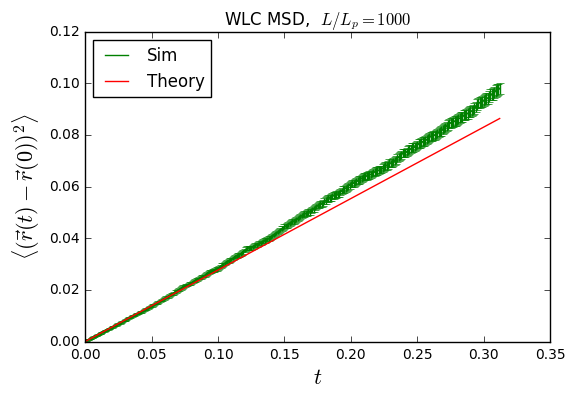

In [114]:
dMean = np.log(length)/length
tm = np.linspace(time[0],time[len(time)-1],1000)
theory = lambda t: (2*ndim)*dMean*(0.5*t)
print length
print ndim
#theory = lambda t: 0.01*(2*ndim)*dMean*t
plt.figure()
plt.plot(time,msd,color='g')
plt.errorbar(time,msd,yerr=msderr,color='g')
plt.plot(tm,theory(tm),'r-')
plt.title("WLC MSD,  "+r'$L/L_p=1000$')
plt.xlabel(r'$t$',fontsize=16)
plt.ylabel(r'$\langle (\vec{r}(t)-\vec{r}(0))^2 \rangle$',fontsize=16)
#plt.xlim(0,2)
#plt.ylim(0,0.02)
plt.legend(["Sim","Theory"],loc=0)
plt.show()

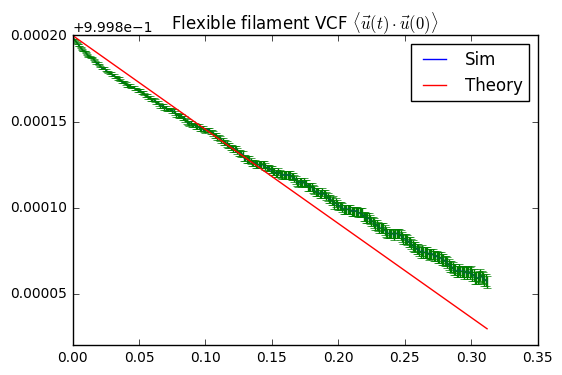

In [115]:
dRot=9.0*(2*np.log(2*length)-1)/(2*length**3)
# Semiflexible chain theory (works for Lp/L ~ 1)
#Lp = 20
#dRot=1.0/(2*Lp)
tm = np.linspace(time[0],time[len(time)-1],1000)
theory = lambda t: np.exp(-dRot*(t))
#theory = lambda t: np.exp(-0.15*dRot*(0.5*t))
#vcf2=[]
#time2=[]
#for i in time:
#    time2.append(i*dRot)
#for i in vcf:
#    vcf2.append(2-2*i)
#theory = lambda t: 2*t
#plt.errorbar(time,meanOrientation,yerr=sems)
#plt.plot(time,vcf)
plt.plot(time,vcf)
plt.errorbar(time,vcf,yerr=vcferr)
plt.plot(tm, theory(tm),'r-')
plt.title("Flexible filament VCF "+r'$\langle \vec{u}(t)\cdot\vec{u}(0) \rangle$')
plt.legend(["Sim","Theory"],loc=0)
plt.show()

In [394]:
f=open("../2d.br_rod.posit.diffusion",'r')
f.readline()
line = f.readline()
line=line.split()
ndim = int(line[0])
delta = float(line[1])
nsteps = int(line[2])
nposit = int(line[3])
nobjs = int(line[4])
f.readline()
time=[]
msd=[]
msderr=[]
vcf=[]
vcferr=[]
for line in f:
    line=line.split()
    time.append(float(line[0]))
    msd.append(float(line[1]))
    msderr.append(float(line[2]))
    vcf.append(float(line[3]))
    vcferr.append(float(line[4]))
f.close()

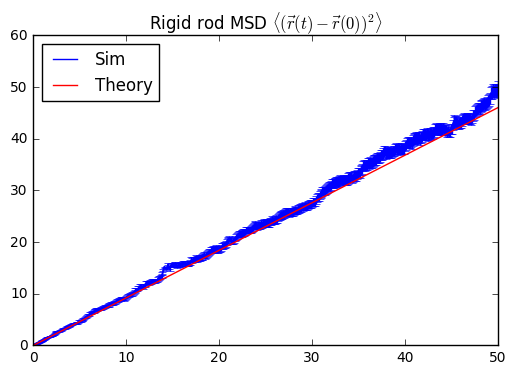

In [395]:
length=10
dMean = np.log(length)/length
tm = np.linspace(time[0],time[len(time)-1],1000)
theory = lambda t: 4*dMean*t
plt.errorbar(time,msd,yerr=msderr)
plt.plot(time,msd,'b-')
plt.plot(tm,theory(tm),'r-')
plt.title("Rigid rod MSD "+r'$\langle (\vec{r}(t)-\vec{r}(0))^2 \rangle$')
plt.legend(["Sim","Theory"],loc=0)
plt.show()

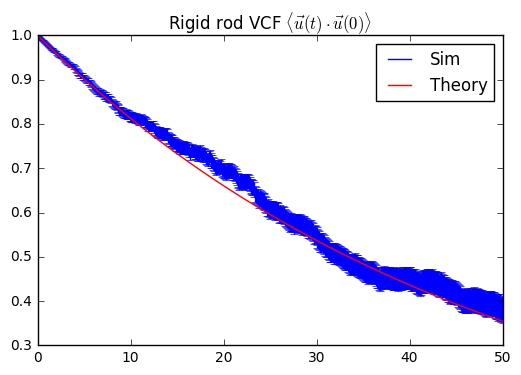

In [396]:
length=10
dRot=9.0*np.log(length)/(length)**3
tm = np.linspace(time[0],time[len(time)-1],1000)
theory = lambda t: np.exp(-(ndim-1)*dRot*t)
#plt.errorbar(time,meanOrientation,yerr=sems)
plt.errorbar(time,vcf,yerr=vcferr)
plt.plot(time,vcf,'b-')
plt.plot(tm, theory(tm),'r-')
plt.title("Rigid rod VCF "+r'$\langle \vec{u}(t)\cdot\vec{u}(0) \rangle$')
plt.legend(["Sim","Theory"],loc=0)
plt.show()

In [383]:
f=open("../2d.br_bead.posit.diffusion",'r')
f.readline()
line = f.readline()
line=line.split()
ndim = int(line[0])
delta = float(line[1])
nsteps = int(line[2])
nposit = int(line[3])
nobjs = int(line[4])
f.readline()
time=[]
msd=[]
msderr=[]
for line in f:
    line=line.split()
    time.append(float(line[0]))
    msd.append(float(line[1]))
    msderr.append(float(line[2]))
f.close()

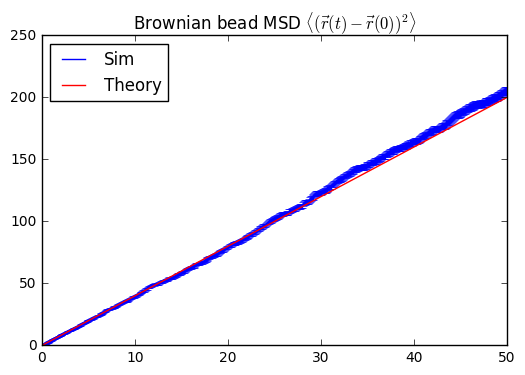

In [384]:
length=1
diffusion=1
tm = np.linspace(time[0],time[len(time)-1],1000)
theory = lambda t: 4*diffusion*t
plt.errorbar(time,msd,yerr=msderr)
plt.plot(time,msd,'b-')
plt.plot(tm,theory(tm),'r-')
plt.title("Brownian bead MSD "+r'$\langle (\vec{r}(t)-\vec{r}(0))^2 \rangle$')
plt.legend(["Sim","Theory"],loc=0)
plt.show()